# Sample Usages of granular functions


Global seed set to 42


Clinical data columns:  Index(['Study ID', 'Patient ID', 'Sample ID', 'Age at Diagnosis',
       'Type of Breast Surgery', 'Cancer Type', 'Cancer Type Detailed',
       'Cellularity', 'Chemotherapy', 'Pam50 + Claudin-low subtype', 'Cohort',
       'ER status measured by IHC', 'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status',
       'Number of Samples Per Patient', 'Sample Type', 'Sex',
       '3-Gene classifier subtype', 'TMB (nonsynonymous)', 'Tumor Size',
       'Tumor Stage', 'Patient's Vital Status'],
      dtype='object')
Single

/Users/dgermen/Documents/GCN Clinical Clinical Outcome Prediction/GNNClinicalOutcomePrediction/bin/custom_tools.py:719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_data['clinical_type'] = c_data.apply(generate_clinical_type, axis=1)


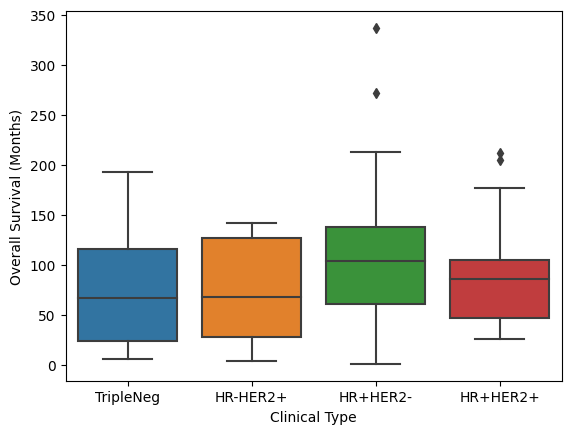

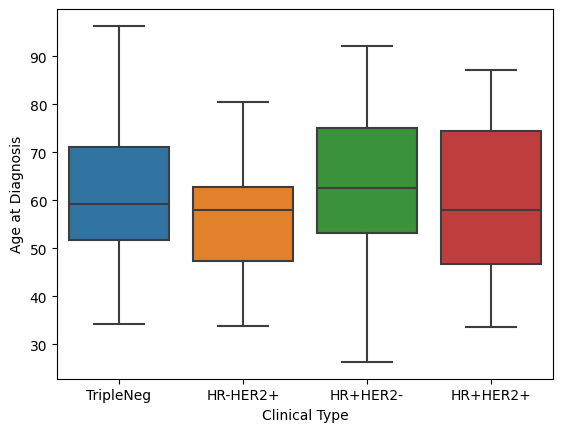

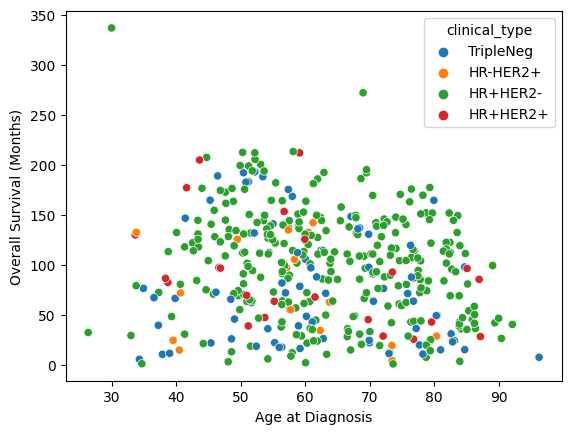

HER2-NAN count:  0
Total count:  404


In [1]:
import plotting
import pandas as pd

c_data  = pd.read_csv("../data/METABRIC/brca_metabric_clinical_data.tsv", sep="\t", index_col=False)
s_c_data = pd.read_csv("../data/METABRIC/single_cell_data.csv", index_col=False)

c_data.columns = c_data.columns.str.strip()

# Removing samples with column ["HER2 Status"] != "Positive" and ["HER2 Status"] !=  "Negative"
c_data = c_data[(c_data["HER2 Status"] == "Positive") | (c_data["HER2 Status"] == "Negative")]


plotting.visualize_clinical_data(c_data=c_data, s_c_data=s_c_data)

In [2]:
import custom_tools

c_data = custom_tools.type_processor(c_data)

custom_tools.p_correlations(c_data, "Age at Diagnosis" ,"Overall Survival (Months)","clinical_type")

Pearson correlation between age and survival:  -0.14590048792436558
Pearson correlation between age and survival for division:  HR+HER2- -0.23957544559987173
Pearson correlation between age and survival for division:  TripleNeg -0.13298294976962075
Pearson correlation between age and survival for division:  HR+HER2+ -0.18453241139541662
Pearson correlation between age and survival for division:  HR-HER2+ 0.05052357033842824


In [ ]:
import data_preparation

data_preparation.METABRIC_preprocess()

merged_metabric = pd.read_csv('../data/METABRIC/merged_data.csv', index=False)  